# Results R1a: What sentiments and topics are present in the diary chunks (single level)?

## Resources

In [3]:
# Get Packages & Libraries
library(tidyverse)
library(rethinking)

In [2]:
# Functions
factorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "character")) # that looks for variables with the character class 
      df[[i]] = as.factor(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

unfactorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "factor")) # that looks for variables with the character class 
      df[[i]] = as.character(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

st <- function(x){
    (x-mean(x,na.rm=TRUE))/sd(x,na.rm=TRUE)
}

In [5]:
# View Data
#df1  <- read.csv("20240702_PhD_FinalData-DiaryChk.csv")
#df1[df1 == ''] <- NA #replace blank cells with NA
#df1 <- df1[-c(1:2)] #drop the index column
#df1 <- factorize(df1)
#glimpse(df1)

In [6]:
# Get Data
# View Data
df2  <- read.csv("20240702_PhD_FinalData-DiaryChk.csv")
df2[df2 == ''] <- NA #replace blank cells with NA
#df2 <- df2[-c(1)] #drop the index column
df2 <- factorize(df2)
glimpse(df2)

Rows: 1,023
Columns: 41
$ docid            <fct> D0002, D0002, D0002, D0002, D0002, D0002, D0002, D000…
$ docyear          <int> 1883, 1883, 1883, 1883, 1883, 1883, 1883, 1883, 1883,…
$ docmonth         <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ authorName       <fct> Anne F. Richards, Anne F. Richards, Anne F. Richards,…
$ docauthorid      <fct> D0002, D0002, D0002, D0002, D0002, D0002, D0002, D000…
$ authorLocation   <fct> Australia, Australia, Australia, Australia, Australia…
$ authorGender     <fct> F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F,…
$ nationalOrigin   <fct> English, English, English, English, English, English,…
$ irish            <fct> False, False, False, False, False, False, False, Fals…
$ otherUK          <fct> True, True, True, True, True, True, True, True, True,…
$ relMin           <fct> False, False, False, False, False, False, False, Fals…
$ catholic         <fct> False, False, False, False, False, False, False, Fals…
$ otherChristian

## Sentiment


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.99160 -0.15870 -0.01155 -0.07138  0.08942  0.98860 

[1] 0.3619947

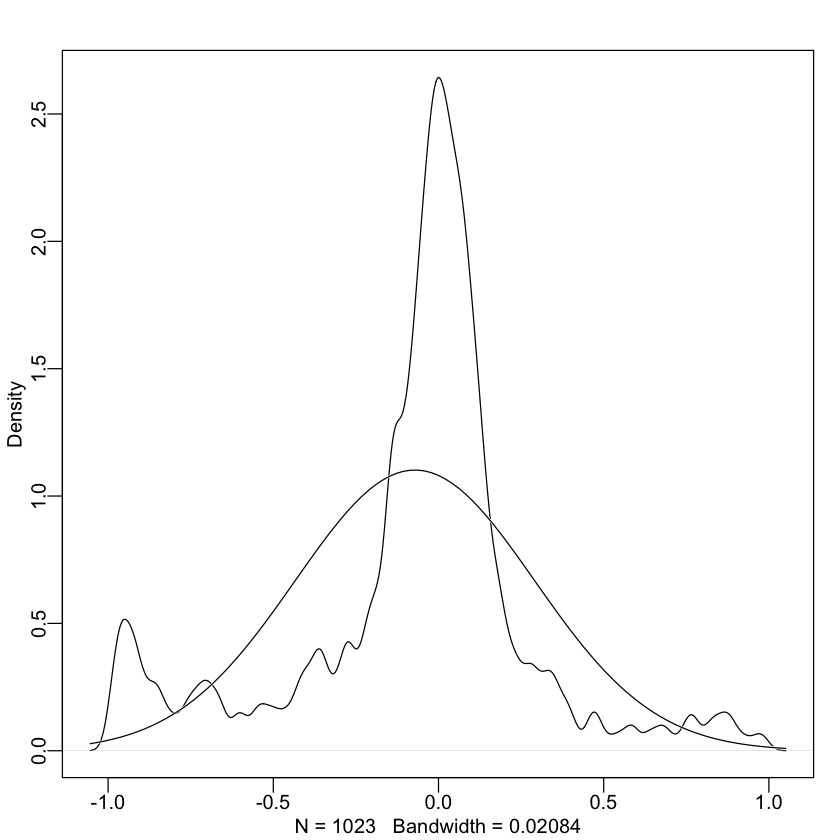

In [7]:
summary(df2$scoreCom)
dens(df2$scoreCom,norm.comp=TRUE)
sd(df2$scoreCom)

In [8]:
# Define them model
m2 <- alist(
    df2$scoreCom ~ dnorm(mu,sigma),
    mu ~ dnorm(0,3),
    sigma ~ dunif(0,10)
)

f2 <- quap(m2,data=df2)
precis(f2, prob=.95)

,mean,sd,2.5%,97.5%
,<dbl>,<dbl>,<dbl>,<dbl>
mu,-0.07138248,0.01131228,-0.09355414,-0.04921083
sigma,0.36181867,0.00799880,0.34614131,0.37749603


In [9]:
save(f2, file = "20240702_PhD_DiaChkSen_01.RData")

Code below adapted from file:///Users/alaynemoody/Dropbox/SOCI620_Resources/20200310_PM_Code17.html

## Topics

In [39]:
# Get counts for topic number
table(as.factor(df2$topicNumber))

# Create new variable with topic labels that match pyLDAvis label numbers
df2$topicLabel <- as.character(df2$topicNumber)
df2$topicLabel[df2$topicLabel=="0"]  <- "01 Housework"
df2$topicLabel[df2$topicLabel=="1"]  <- "02 Places"
df2$topicLabel[df2$topicLabel=="2"]  <- "03 Business"
df2$topicLabel[df2$topicLabel=="3"]  <- "04 Girl Privilege"
df2$topicLabel[df2$topicLabel=="4"]  <- "05 Working Boy"
df2$topicLabel[df2$topicLabel=="5"]  <- "06 Weather"
df2$topicLabel[df2$topicLabel=="6"]  <- "07 People"
df2$topicLabel[df2$topicLabel=="7"]  <- "08 Politics"
df2$topicLabel[df2$topicLabel=="8"]  <- "09 Outback"
df2$topicLabel[df2$topicLabel=="9"]  <- "10 Home"
df2$topicLabel <- as.factor(df2$topicLabel)

# Check
df2 %>% 
select(topicNumber, topicLabel) %>% 
unique() %>% 
arrange(topicLabel)

table(df2$topicLabel)
sum(is.na(df2$topicLabel))



  0   1   2   3   4   5   6   7   8   9 
135 111 100 144 107  71  89 109  93  64 

topicNumber,topicLabel
<int>,<fct>
0,01 Housework
1,02 Places
2,03 Business
3,04 Girl Privilege
4,05 Working Boy
5,06 Weather
6,07 People
7,08 Politics
8,09 Outback



     01 Housework         02 Places       03 Business 04 Girl Privilege 
              135               111               100               144 
   05 Working Boy        06 Weather         07 People       08 Politics 
              107                71                89               109 
       09 Outback           10 Home 
               93                64 

[1] 0

In [40]:
m3 <- alist(
  topicLabel ~ dcategorical(softmax(t_01Housework,
                                    t_02Places, 
                                      t_03Business,
                                      t_04GirlPrivilege,
                                      t_05WorkingBoy,
                                      t_06Weather,
                                      t_07People,
                                      t_08Politics,
                                      t_09Outback,
                                      t_10Home
                                   )),
    t_01Housework <- a_01Housework,
    t_02Places <- a_02Places,
    t_03Business <- a_03Business,
    t_04GirlPrivilege <- a_04GirlPrivilege, 
    t_05WorkingBoy <- a_05WorkingBoy, 
    t_06Weather <- a_06Weather, 
    t_07People <- a_07People, 
    t_08Politics <- a_08Politics,
    t_09Outback <- a_09Outback,
    t_10Home <- a_10Home,
  
    c(a_01Housework,
      a_02Places, 
    a_03Business,
    a_04GirlPrivilege,
    a_05WorkingBoy,
    a_06Weather,
    a_07People,
    a_08Politics,
    a_09Outback,
    a_10Home) ~ dnorm(0,2)
) #(0219 Code 7, 2015 McElreath 10.58)

In [41]:
# Give it starting values
st <- list(a_01Housework = 0,
           a_02Places = 0, 
    a_03Business = 0,
    a_04GirlPrivilege = 0,
    a_05WorkingBoy = 0,
    a_06Weather = 0,
    a_07People = 0,
    a_08Politics = 0,
    a_09Outback = 0,
    a_10Home = 0)

In [42]:
f3 <- quap(m3,data=df2, start = st)
precis(f3,prob=.95)

,mean,sd,2.5%,97.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a_01Housework,0.304842093,0.6379273,-0.9454724,1.5551566
a_02Places,0.109415389,0.6389253,-1.1428551,1.3616859
a_03Business,0.005289147,0.6395411,-1.2481884,1.2587667
a_04GirlPrivilege,0.369303890,0.6376382,-0.8804440,1.6190518
a_05WorkingBoy,0.072790813,0.6391347,-1.1798902,1.3254718
a_06Weather,-0.336005645,0.6420653,-1.5944305,0.9224192
a_07People,-0.110920113,0.6403073,-1.3658994,1.1440592
a_08Politics,0.091270498,0.6390281,-1.1612015,1.3437425
a_09Outback,-0.067087991,0.6400080,-1.3214806,1.1873046


In [43]:
# Check to make sure the predicted probabilities amount to 1

# get the predicted coefficients
cf <- coef(f3)

t1 <- c(cf['a_01Housework'],
        cf['a_02Places'],
        cf['a_03Business'],
        cf['a_04GirlPrivilege'],
        cf['a_05WorkingBoy'],
        cf['a_06Weather'],
        cf['a_07People'],
        cf['a_08Politics'],
        cf['a_09Outback'],
        cf['a_10Home']
)

p1 <- softmax(t1[[1]],t1[[2]],t1[[3]],t1[[4]], t1[[5]], t1[[6]], t1[[7]], t1[[8]], t1[[9]], t1[[10]])
sum(p1)

[1] 1

In [44]:
# Put the predicted probablities into a table
names(p1) <- c('Housework',
               "Places",
               "Business",
               "Girl Privilege",
               "Working Boy",
               "Weather",
               "People",
               "Politics",
               "Outback",
               "Home"
              )

p1 <- round(p1, digits = 2)
topicVis  <- t(data.frame(as.list(p1)))
colnames(topicVis)  <-  "Probability"
topicVis

,Probability
Housework,0.13
Places,0.11
Business,0.10
Girl.Privilege,0.14
Working.Boy,0.10
Weather,0.07
People,0.09
Politics,0.11
Outback,0.09
Home,0.06


Rows: 10
Columns: 1
$ Probability <dbl> 0.13, 0.11, 0.10, 0.14, 0.10, 0.07, 0.09, 0.11, 0.09, 0.06


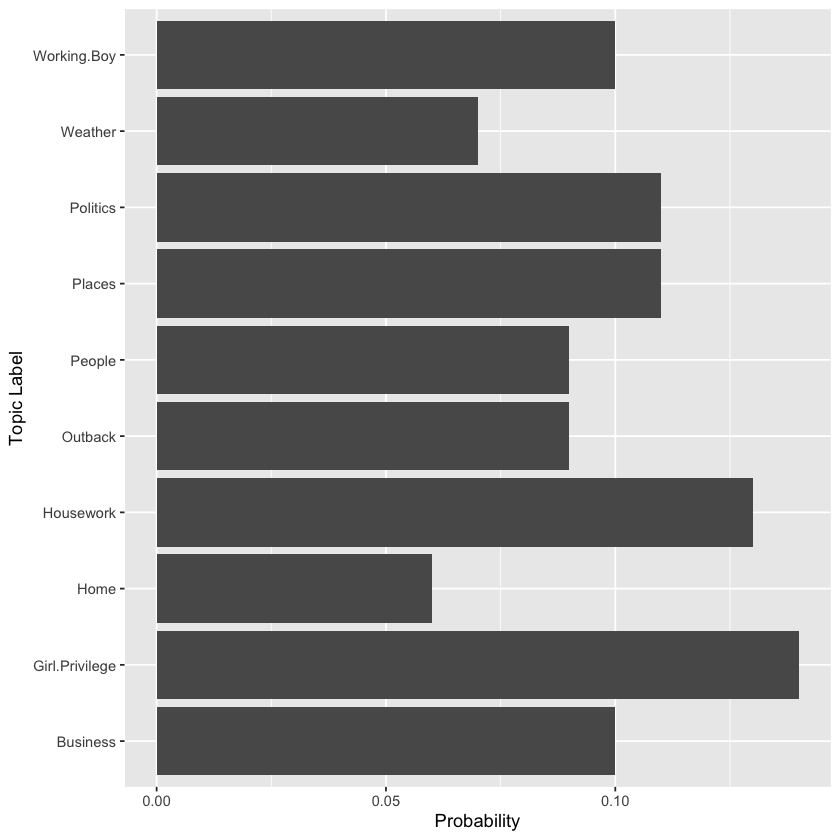

In [45]:
# Make a graph

topicVis <- as.data.frame(topicVis)
glimpse(topicVis)

# Barplot
p  <- ggplot(topicVis, aes(x=rownames(topicVis), y=Probability)) + 
  geom_bar(stat = "identity") +
  coord_flip() + xlab("Topic Label")
p

In [46]:
ggsave("20240702_PhD_DiaChkTop01.png")

Saving 7 x 7 in image


In [47]:
save(f3, file = "20240702_PhD_DiaChkTop_01.RData")

In [149]:
#comp <- complete.cases(df1[c('topicLabelR')])

## Socials

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.003704 0.027675 0.037415 0.039257 0.048689 0.111913 

[1] 0.01616384

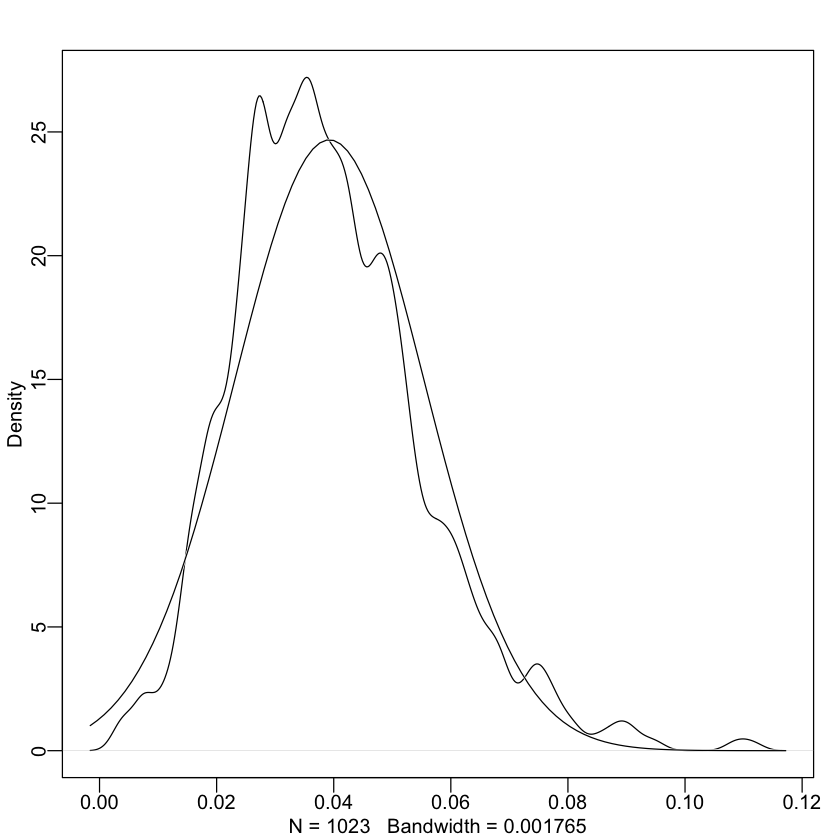

In [33]:
# Create a new token that reflects the rate of total individuals relative to total tokens
df2$mentsRate <- df2$mentsTot/df2$totalTokens
summary(df2$mentsRate)
dens(df2$mentsRate,norm.comp=TRUE)
sd(df2$mentsRate)

In [34]:
# Define them model
m7 <- alist(
    df2$mentsRate ~ dnorm(mu,sigma),
    mu ~ dnorm(0,1),
    sigma ~ dunif(0,10)
)

f7 <- quap(m7,data=df2)
precis(f7, prob=.95)

,mean,sd,2.5%,97.5%
,<dbl>,<dbl>,<dbl>,<dbl>
mu,0.03927846,0.0005055864,0.03828752,0.04026939
sigma,0.01617084,0.0003518525,0.01548122,0.01686046


In [35]:
save(f7, file = "20240702_PhD_DiaChkSocM_01.RData")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01495 0.02465 0.02728 0.03521 0.09343 

[1] 0.01653195

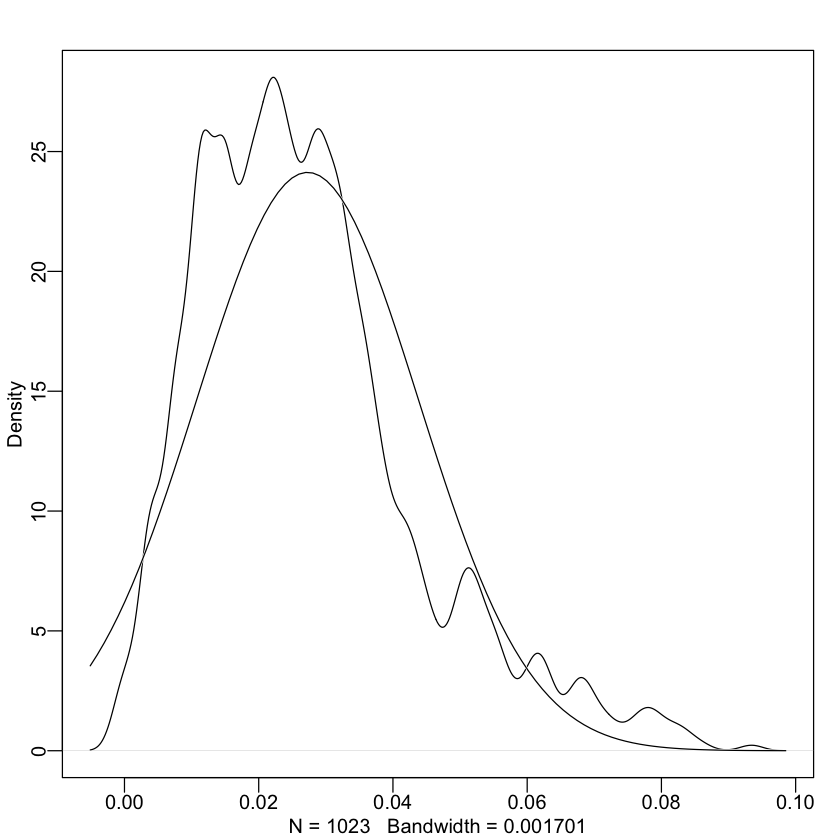

In [36]:
# Create a new token that reflects the rate of all 1st person pronouns relative to total tokens
df2$fppAllRate <- df2$fppAll_Ct/df2$totalTokens
summary(df2$fppAllRate)
dens(df2$fppAllRate,norm.comp=TRUE)
sd(df2$fppAllRate)

In [37]:
# Define them model
m8 <- alist(
    df2$fppAllRate ~ dnorm(mu,sigma),
    mu ~ dnorm(0,1),
    sigma ~ dunif(0,10)
)

f8 <- quap(m8,data=df2)
precis(f8, prob=.95)

,mean,sd,2.5%,97.5%
,<dbl>,<dbl>,<dbl>,<dbl>
mu,0.02728655,0.0005178831,0.02627152,0.02830159
sigma,0.01656417,0.0003615195,0.01585560,0.01727273


In [38]:
save(f8, file = "20240702_PhD_DiaChkSocF_01.RData")